<h1><center>Práctica Aprendizaje Supervisado: Modelos.</center></h1>

# 0. Librerías

In [1]:
# Paquetes y librerias
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt  

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

En primer lugar, obtenemos los datos del análsis exploratorio hecho previamente ya habiendo separado en datos de entrenamiento y datos de test

In [3]:
# Guardamos los datos
X_train = pd.read_csv('X_train.csv')
X_train = X_train.drop('index',axis = 1)
X_test = pd.read_csv('X_test.csv')
X_test = X_test.drop('index',axis = 1)
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')
y_train_clas = pd.read_csv('y_train_clas.csv')
y_test_clas = pd.read_csv('y_test_clas.csv')

# 3. Modelos

Para evaluar los distintos modelos vamos a tener en cuenta que:

Para un problema de **clasificación** podemos emplear las medidas:

<img src="confusion_matix_example.png">
<center style="color:#888">Métricas<br/></center>

Importamos para ello las siguientes librerias

In [5]:
# Metricas para clasificacion
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

Para poder comparar los diferentes modelos vamos a guardar las métricas en un diccionario

In [6]:
acc_train = {}
acc_test = {}
mc = {}
precision = {}
recall = {}

Para un problema de **regresión** utilizamos las medidas:

Sobre otro conjunto de evaluación $\mathcal{D_{te}}$, podemos evaluar la calidad de las predicciones. Como $y$ es una variable continua ahora, no tiene sentido utilizar la tasa de aciertos o accuracy. Las más comunes son 

* Error cuadrático medio $\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2$

* Coeficiente de determinación $R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$

In [7]:
# Librerias para metricas de regresion
from sklearn.metrics import mean_squared_error, r2_score

Así, para realizar la comparación entre los modelos vamos a guardar las métricas de cada uno en los diccionarios:

In [8]:
rmse = {}
r2 = {}

También tendremos en cuenta la matriz de confusión para estos modelos. Para ello, agruparemos las predicciones en las diferentes categorias

## 3.1 Regresión lineal

El modelo de regresión lineal tiene la siguiente forma parámetrica:

$$
\hat{y} = \beta_0 + \beta_1 x_1 \ldots + \beta_p x_p 
$$

donde $\hat{y} \in \mathbb{R}$ es la variable a predecir y los datos tienen $p$ columnas, $x \in \mathbb{R}^p$. 

Asumiendo un conjunto de datos de entrenamiento, $\mathcal{D_{tr}} = \lbrace (x, y) \rbrace$, los parámetros $\beta, \beta_0$ se pueden ajustar resolviendo el siguiente problema de optimización (mínimos cuadrados):

$$
\min_{\beta, \beta_0} \sum_{x \in \mathcal{D_{tr}}} (\hat{y} - y )^2 = \min_{\beta, \beta_0} \sum_{x \in \mathcal{D_{tr}}} (\beta^\intercal x + \beta_0 - y )^2
$$

In [9]:
# Librerias
from sklearn.linear_model import LinearRegression

Ajustamos el modelo de regresión lineal

In [10]:
# Ajustamos el modelo de regresion lineal 
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predicciones
y_pred = reg.predict(X_test)

En primer lugar, vemos los coeficientes del modelo. A partir de estos coeficientes, podemos determinar qué características son más relevantes a la hora de predecir el precio de las casas.

In [11]:
print('Término independiente: \n', reg.intercept_)
print('Coeficientes: \n', reg.coef_)

Término independiente: 
 [12.83120791]
Coeficientes: 
 [[ 0.31192866 -0.02827324  0.21321956  0.0043072  -0.01052641  0.03714938
   0.23199301  0.2133206   0.31642743  0.57443016 -0.00630929  0.14044341
   0.17482641  0.22179074]]


Como se trata de un modelo de regresión podemos validarlo con los residuos, junto con las correspondientes métricas.

Primero, estudiamos los residuos del modelo para comprobar las hipótesis de normalidad, indepedendencia y homocedasticidad.
Este estudio lo comprobaremos una única vez. 

In [12]:
# Paquetes
import scipy.stats as stats
import statsmodels.api as sm

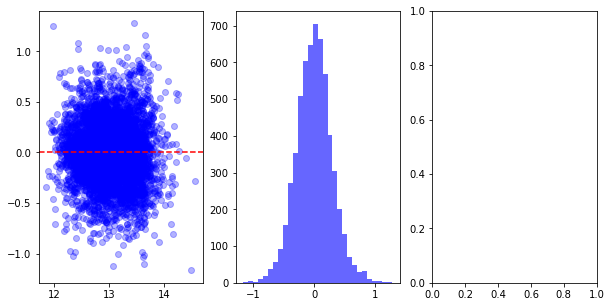

In [13]:
# Residuos
res = y_test - y_pred

# Graficos
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].scatter(y_pred,res, alpha = 0.3, color='blue') # Res vs fitt
axs[0].axhline(y=0, color='r', linestyle='--')
axs[1].hist(res, bins=30, alpha = 0.6, color='blue') # Histograma de los residuos
#axs[2].qqplot(res, line='45')

plt.show()

En segundo lugar, calculamos las métricas y vemos el ajuste del modelo.

In [14]:
# Metricas
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))
r2_lr  = r2_score(y_test, y_pred)
# Error Cuadrado Medio
print("Root Mean squared error: %.2f" % rmse_lr)
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_lr)

Root Mean squared error: 0.29
Variance score: 0.63


Por último, almacenamos los datos para la comparativa final

In [15]:
# Almacenamos los datos
rmse['LR'] = rmse_lr
r2['LR'] = r2_lr

Como ya comentamos, podemos estudiar la matriz de confusión para así poder comparar todos lo métodos. Para ello, clasificamos las predicciones hechas por el modelo de regresión lineal en las tres categoricas y comparamos con los datos de *y_test_clas*.

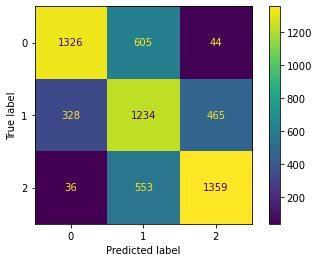

In [16]:
# Matriz de confusion para regresion lienal
bins = [11.224,12.78, 13.218, 14.897]
y_pred = pd.cut(y_pred.flatten(), bins=bins, labels=False)

mc_lr = confusion_matrix(y_test_clas, y_pred)
ConfusionMatrixDisplay(confusion_matrix=mc_lr).plot();

# Almacenamos los datos
mc['LR'] = mc_lr

## 3.2 K-NN

El algoritmo de los k vecinos más cercanos es un algoritmo de aprendizaje supervisado usado tanto en problemas de regresión como en problemas de clasificación. Es un método no paramétrico que asume que existen similaridades en la proximidad sin necesidad de que los datos respondan a una linealidad. 

El algoritmo calcula las distancias entre los datos de test y todos los puntos de los datos de entrenamiento, escogiendo un número $k$ de distancias mínimas. Para realizar la predicción se realiza un promedio de los valores dependientes.

**Regresión**

En primer lugar, queremos encontrar el número de vecinos óptimo. Para ello, creamos una rejilla con diferentes valores de $k$ , que iremos recorriendo, y almacenando sus correspondientes métricas al ajustar el modelo. Así, tomaremos aquel $k$ que aporte un mejor valor para las métricas.

In [17]:
# Librerias
from sklearn.neighbors import KNeighborsRegressor

In [18]:
ks = list(range(1,21))

# En este diccionario iremos guardando las metricas sobre test asociadas a cada valor de $k$
rmses = {}
r2s = {}

# Vamos recorriendo la rejilla con un bucle for
for k in ks:
    
    # Definimos el modelo con el valor de hiperparametro correspondiente
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Ajustamos a los datos de entrenamiento
    knn.fit(X_train, y_train)
    
    # Hacemos predicciones sobre los datos de test
    y_pred = knn.predict(X_test)
    
    # Evaluamos y guardamos la metrica correspondiente 
    rmse_m = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_m  = r2_score(y_test, y_pred)
    rmses[k] = rmse_m
    r2s[k] = r2_m

min_rmses = min(rmses,key=rmses.get)
max_r2s = max(r2s, key=r2s.get)
    
print("Mejor hiperparámtero RMSE:", min_rmses)
print("Mejor hiperparámetro R2:", max_r2s)

Mejor hiperparámtero RMSE: 7
Mejor hiperparámetro R2: 7


Mediante los gráficos de codo, podemos decidir el número $k$ de vecinos óptimo para el problema.

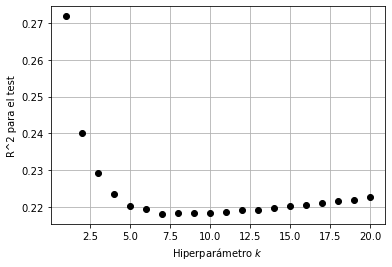

In [19]:
# Error cuadratico medio para el test
ks_arr = np.fromiter(rmses.keys(), dtype=int)
rmses_arr = np.fromiter(rmses.values(), dtype=float)

plt.plot(ks_arr, rmses_arr, 'ok')
plt.grid(True)
plt.xlabel('Hiperparámetro $k$');
plt.ylabel('R^2 para el test');

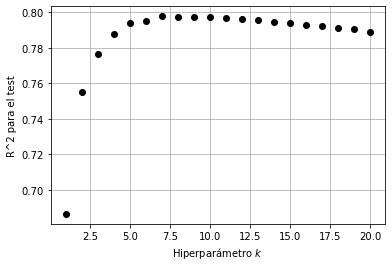

In [20]:
# R2 para el test
ks_arr = np.fromiter(r2s.keys(), dtype=int)
r2s_arr = np.fromiter(r2s.values(), dtype=float)

plt.plot(ks_arr, r2s_arr, 'ok')
plt.grid(True)
plt.xlabel('Hiperparámetro $k$');
plt.ylabel('R^2 para el test');

Así, decidimos ajustar el modelo con $k=5$ vecinos

In [22]:
# Definimos el modelo con el valor de hiperparametro correspondiente
knn = KNeighborsRegressor(n_neighbors=5)
    
# Ajustamos a los datos de entrenamiento
knn.fit(X_train, y_train)
    
# Hacemos predicciones sobre los datos de test
y_pred = knn.predict(X_test)

Calculamos las medidas de error y ajuste del modelo

In [23]:
# Medidas de error
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred))
r2_knn  = r2_score(y_test, y_pred)
# Error Cuadrado Medio
print("Root Mean squared error: %.2f" % rmse_knn)
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_knn)

Root Mean squared error: 0.22
Variance score: 0.79


In [24]:
# Almacenamos los datos
rmse['KNN'] = rmse_knn
r2['KNN'] = r2_knn

Nuevante, aun tratándose de un problema de regresión, hallamos la matriz de confusión.

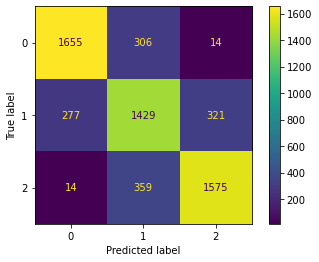

In [25]:
# Matriz de confusion para KNN Regressor
y_pred = pd.cut(y_pred.flatten(), bins=bins, labels=False)

mc_knn_reg = confusion_matrix(y_test_clas, y_pred)
ConfusionMatrixDisplay(confusion_matrix=mc_knn_reg).plot();

# Almacenamos los datos
mc['knn_reg'] = mc_knn_reg

**Clasificación**

Otra opción es estudiar el problema desde el punto de vista de la clasificación.

Primero, buscamos el número óptimo de vecions $k$ recorriendo la rejilla.

In [26]:
# Librerias
from sklearn.neighbors import KNeighborsClassifier

In [27]:
ks = list(range(1, 30))

# En este diccionario iremos guardando las accuracies sobre test asociadas a cada valor de $k$
accs = {}

# Vamos recorriendo la rejilla con un bucle for...
for k in ks:
    
    # Definimos el modelo con el valor de hiperparametro correspondiente
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Ajustamos a los datos de entrenamiento
    knn.fit(X_train, y_train_clas.values)
    
    # Hacemos predicciones sobre los datos de test
    y_pred = knn.predict(X_test)
    
    # Evaluamos y guardamos la metrica correspondiente (en este caso accuracy)
    acc = accuracy_score(y_test_clas, y_pred)
    accs[k] = acc
    
max_acc = max(accs, key=accs.get)    
print("Mejor hiperparámtero:", max_acc)

Mejor hiperparámtero: 17


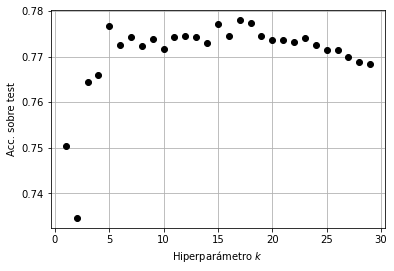

In [28]:
ks_arr = np.fromiter(accs.keys(), dtype=int)
accs_arr = np.fromiter(accs.values(), dtype=float)

plt.plot(ks_arr, accs_arr, 'ok')
plt.grid(True)
plt.xlabel('Hiperparámetro $k$');
plt.ylabel('Acc. sobre test');

A la vista del gráfico, decidimos tomar $k=5$ vecinos.

In [29]:
# Definimos el modelo con el valor de hiperparametro correspondiente
knn = KNeighborsClassifier(n_neighbors=5)
    
# Ajustamos a los datos de entrenamiento
knn.fit(X_train, y_train_clas)

# Hacemos predicciones sobre los datos de test
y_pred_train_knn = knn.predict(X_train)
# Hacemos predicciones sobre los datos de test
y_pred_knn = knn.predict(X_test)

En primer lugar, vemos cómo de bueno ha sido el entrenamiento

In [30]:
# Ajuste del entrenamiento
acc_train_knn = accuracy_score(y_pred_train_knn,y_train_clas)
print('Accuracy train KNN: ', acc_train_knn)

Accuracy train KNN:  0.8459876098544878


Estudiamos el ajuste del modelo para los datos de test con las diferentes métricas descritas al principio.

In [31]:
# Ajuste del modelo para los datos de test
acc_test_knn = accuracy_score(y_pred_knn, y_test_clas)
print('Accuracy test KNN: ', acc_test_knn)

Accuracy test KNN:  0.7768067226890756


Vemos el gráfico de la matriz de confusión

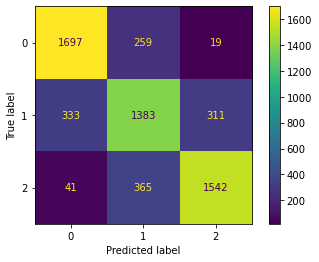

In [32]:
# Grafico de matriz de confusion
mc_knn = confusion_matrix(y_test_clas, y_pred_knn)
ConfusionMatrixDisplay(confusion_matrix=mc_knn).plot();

Guardamos las métricas

In [33]:
# Almacenamos los datos
acc_test['knn'] = acc_test_knn
acc_train['knn'] = acc_train_knn
mc['knn'] = mc_knn
precision['knn'] = precision_score(y_test_clas, y_pred_knn, average='weighted')
recall['knn'] = recall_score(y_test_clas, y_pred_knn,average='weighted')

## 3.3 Árbol de decisión simple

Un árbol de decisión es un modelo de aprendizaje automático que se utiliza para predecir una variable objetivo a partir de un conjunto de variables de entrada. El árbol se divide en ramas que representan decisiones basadas en las variables de entrada, y las hojas del árbol representan la predicción final para la variable objetivo.

Cada nodo en el árbol corresponde a una pregunta sobre una de las variables de entrada y la respuesta a esa pregunta determina en qué rama del árbol continuar. El objetivo es crear un árbol que sea lo suficientemente simple como para ser fácilmente interpretable, pero lo suficientemente preciso como para hacer predicciones precisas.

**Regresión**

In [34]:
# Librerias
from sklearn.tree import DecisionTreeRegressor

In [35]:
# Definimos el modelo
tree_regressor = DecisionTreeRegressor()

# Ajustamos el modelo
tree_regressor.fit(X_train, y_train)

# Realizamos predicciones sobre test
y_pred = tree_regressor.predict(X_test)

In [36]:
# Medidas de error
rmse_tree_reg = np.sqrt(mean_squared_error(y_test, y_pred))
r2_tree_reg  = r2_score(y_test, y_pred)
# Error Cuadrado Medio
print("Root Mean squared error: %.2f" % rmse_tree_reg)
# Puntaje de Varianza
print('Variance score: %.2f' % r2_tree_reg)

Root Mean squared error: 0.25
Variance score: 0.73


In [37]:
# Almacenamos los datos
rmse['Arbol'] = rmse_tree_reg
r2['Arbol'] = r2_tree_reg

In [38]:
# Matriz de confusion para Tree Regressor
y_pred = pd.cut(y_pred.flatten(), bins=bins, labels=False)

mc_tree_reg = confusion_matrix(y_test_clas, y_pred)
ConfusionMatrixDisplay(confusion_matrix=mc_tree_reg).plot();

# Almacenamos los datos
mc['Arbol_reg'] = mc_tree_reg

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

**Clasificación**

In [39]:
# Librerias
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

Como desconocemos la profundidad óptima, vamos a utilizar la función *GridSearchCV()* para hallarlo. 

In [40]:
# Definimos el modelo
tree_class = DecisionTreeClassifier()

# Posibles profundidades 
ps = np.array(range(3,10))
h_parameters = {'max_depth':ps}
cv = GridSearchCV(tree_class, h_parameters,cv=10,n_jobs=-1,scoring = 'accuracy')
cv.fit(X_train,y_train_clas)

# Mejor profundidad
cv.best_estimator_
print('Mejor hiperparámetro:', cv.best_params_)

Mejor hiperparámetro: {'max_depth': 9}


Obtenemos así que la profundidad óptima es $\text{max_depth}=9$

In [41]:
# Ajuste del modelo
tree_class = DecisionTreeClassifier(max_depth=9, random_state=0)
tree_class.fit(X_train,y_train_clas)

# Hacemos predicciones sobre los datos de test
y_pred_train_tree = tree_class.predict(X_train)
# Hacemos predicciones sobre los datos de test
y_pred_tree = tree_class.predict(X_test)

En primer lugar, vemos cómo de bueno ha sido el entrenamiento.

In [42]:
# Ajuste datos train
acc_train_tree = accuracy_score(y_pred_train_tree, y_train_clas)
print('Accuracy train árbol: ', acc_train_tree)

Accuracy train árbol:  0.8455553954761562


Estudiamos el ajuste del modelo a los datos de test

In [43]:
# Ajuste del modelo para los datos de test
acc_test_tree = accuracy_score(y_pred_tree, y_test_clas)
print('Accuracy test árbol: ', acc_test_tree)

Accuracy test árbol:  0.7821848739495798


Además, también podemos ver otras métricas con la función que habíamos definido previamente.

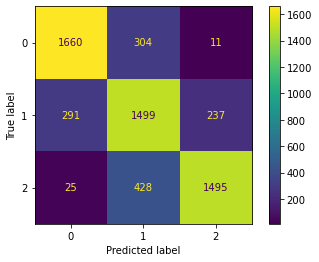

In [45]:
# Grafico de matriz de confusion
mc_tree = confusion_matrix(y_test_clas, y_pred_tree)
ConfusionMatrixDisplay(confusion_matrix=mc_tree).plot();

In [46]:
# Almacenamos los datos
acc_test['Arbol'] = acc_test_tree
acc_train['Arbol'] = acc_train_tree
mc['Arbol'] = mc_tree
precision['Arbol'] = precision_score(y_test_clas, y_pred_tree, average='weighted')
recall['Arbol'] = recall_score(y_test_clas, y_pred_tree,average='weighted')

Además podemos ver en primer lugar el árbol de decisión y, en segundo lugar, un gráfico que nos ayuda a ver la relevancia de las variables a la hora de predecir el precio

In [ ]:
from sklearn import tree

In [ ]:
# Arbol de decision
plt.figure(figsize=(100,20))
tree.plot_tree(tree_class, fontsize=10)
plt.show()

También podemos estudiar qué variables son más relevantes a la hora de predecir el precio de las casas

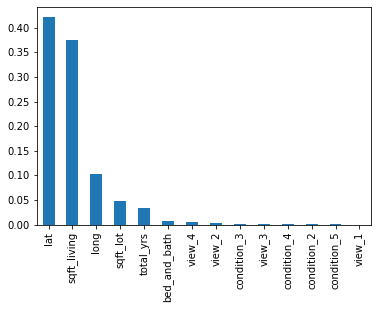

In [47]:
# Importancia de las varibales
feature_importances = pd.Series(tree_class.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances.plot.bar();

## 3.4 Bagging

Los algoritmos de bagging son algoritmos de ensemble que tiene como objetivo reducir la varianza de cada uno de los algoritmos individuales agregando diferentes algoritmos y sus respectivas predicciones.

Así, los algoritmos de bagging crean diferentes muestras boostrap con remplazaiento del conjunto de datos de entrenamiento, y cada método individual es entrenado en una de las diferentes remuestras creadas.

Aunque se puede crear un propio algoritmo de ensemble, normalmente se suelen utilizar árboles de decisión. 

**Regresión**

In [48]:
# Librerias 
from sklearn.ensemble import BaggingRegressor

En primer lugar, ajustamos el modelo tomando como modelos individuales 10 árboles regresores.

In [49]:
# Ajustamos el modelo
bagg_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                        n_estimators=10, random_state=0).fit(X_train, y_train)
# Hacemos predicciones
y_pred = bagg_reg.predict(X_test)

Calculamos las métricas y el ajuste del modelo

In [50]:
# Medidas de error
rmse_bagg = np.sqrt(mean_squared_error(y_test, y_pred))
r2_bagg  = r2_score(y_test, y_pred)
# Error Cuadrado Medio
print("Root Mean squared error: %.2f" % rmse_bagg)
# Puntaje de Varianza
print('Variance score: %.2f' % r2_bagg)

Root Mean squared error: 0.19
Variance score: 0.84


Almacenamos las métricas correspondientes

In [51]:
# Almacenamos los datos
rmse['Bagg_Reg'] = rmse_bagg
r2['Bagg_Reg'] = r2_bagg

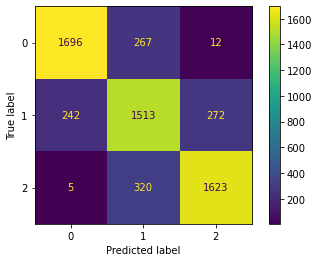

In [52]:
# Matriz de confusion para Bagging Regressor
y_pred = pd.cut(y_pred.flatten(), bins=bins, labels=False)

mc_bagg_reg = confusion_matrix(y_test_clas, y_pred)
ConfusionMatrixDisplay(confusion_matrix=mc_bagg_reg).plot();

# Almacenamos los datos
mc['Bagg_Reg'] = mc_bagg_reg

**Clasificación**

In [53]:
# Librerias
from sklearn.ensemble import BaggingClassifier

Primero, encontramos los hiperparámetros óptimos del modelo, esto es, el número de modelos individuales o "*estimadores*"

In [54]:
estimator_range = np.array(range(2,20,2))

models = []
scores = []

for n_estimators in estimator_range:
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 0)
    clf.fit(X_train, y_train_clas)
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test_clas, y_pred = clf.predict(X_test)))

Mediante un gráfico similar al de codo, vamos a estudiar los accuracies del modelo para, en base a ello, decidir el número de estimadores.

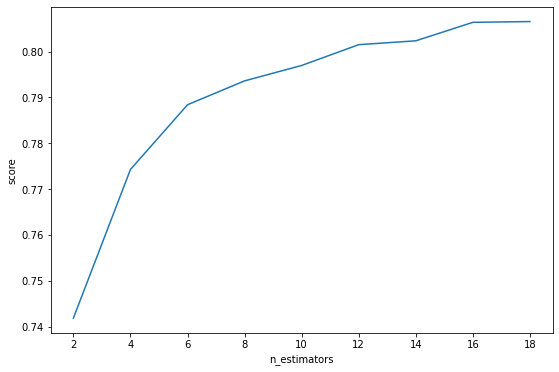

In [55]:
# Grafico
plt.figure(figsize=(9,6))

plt.plot(estimator_range, scores)

plt.xlabel("n_estimators")
plt.ylabel("score")

plt.show()

Así, decidimos utilizar $16$ árboles de decisión

In [56]:
# Ajustamos el modelo
clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 16,random_state = 0)
clf.fit(X_train, y_train_clas)

# Hacemos predicciones sobre los datos de test
y_pred_train_clf = clf.predict(X_train)
# Hacemos predicciones sobre los datos de test
y_pred_clf = clf.predict(X_test)

Por un lado, vemos cómo de bueno ha sido el entrenamiento

In [57]:
# Ajuste datos train
acc_train_clf = accuracy_score(y_pred_train_clf, y_train_clas)
print('Accuracy train Bagging: ', acc_train_clf)

Accuracy train Bagging:  0.992652355568362


Ahora, procedemos a ver el ajuste del modelo con los datos de test

In [58]:
# Ajuste del modelo para los datos de test
acc_test_clf = accuracy_score(y_pred_clf, y_test_clas)
print('Accuracy test Bagging: ', acc_test_clf)

Accuracy test Bagging:  0.8063865546218487


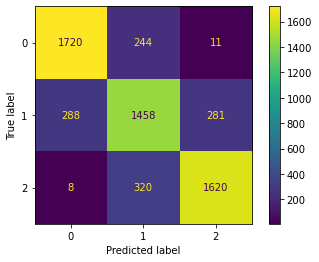

In [59]:
# Grafico de matriz de confusion
mc_clf = confusion_matrix(y_test_clas, y_pred_clf)
ConfusionMatrixDisplay(confusion_matrix=mc_clf).plot();

In [60]:
# Almacenamos los datos
acc_test['Bagging'] = acc_test_clf
acc_train['Bagging'] = acc_train_clf
mc['Bagging'] = mc_clf
precision['Bagging'] = precision_score(y_test_clas, y_pred_clf, average='weighted')
recall['Bagging'] = recall_score(y_test_clas, y_pred_clf,average='weighted')

## 3.5 Random Forest

Se trata de un modelo de ensemble que combia varios árboles de decisión para hacer predicciones. Así, cada árbol de decisión es entrenado en un subconjunto de los datos de entrenamiento elegido de manera aleatoria, lo que ayuda a reducir el problema de overfitting (o sobreajuste). Las predicciones se realizan teniendo en cuenta la clasificación mayoritaria de las predicciones de cada árbol individual.

Se trata de un tipo específico de método de Bagging, pues además de usar muestras bootstrap de los datos de entrenamiento, cada árbol se entrena en un subconjunto aleatorio de características.

**Regresión**

In [61]:
# Librerias
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

Como sucedía con los árboles de decisión, podemos utilizar técnicas de cross validation para hallar:
* **n_estimators**: Número de árboles de decisión para el random forest. En general, el ajuste del modelo es mejor mayor es este hiperparámetro, pero también incrementa el coste computacional para realizar predicciones.
* **max_depth**: La profundidad del árbol. Como ya vimos, si la profundidad es muy alta puede llevarnos a overfitting mientras que si es muy baja podremos tener problemas de underfitting.

Es este caso vamos a utilizar la función RandomizedSearch()

In [62]:
# Posibles profundidades y estimadores 
ps = np.array(range(50,250))
ns = np.array(range(3,10))

h_parameters = {'n_estimators': ps,
                'max_depth': ns}

# Definimos el modelo
rf = RandomForestRegressor()

# Busqueda aleatorizada de hiperparametros 
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = h_parameters, 
                                 n_iter=5, 
                                 cv=5)
rand_search.fit(X_train, y_train)

# Mejores parametros
best_rf = rand_search.best_estimator_
print('Mejores hiperparámetros:',  rand_search.best_params_)

Mejores hiperparámetros: {'n_estimators': 148, 'max_depth': 9}


Con estos parámteros, podemos ajustar el modelo

In [63]:
# Ajustamos el modelo
rf = RandomForestRegressor(n_estimators=145,max_depth=7)
rf.fit(X_train, y_train)

# Hacemos predicciones sobre los datos de test
y_pred = rf.predict(X_test)

Calculamos las métricas para ver el ajuste del modelo

In [64]:
# Medidas de error
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
r2_rf  = r2_score(y_test, y_pred)
# Error Cuadrado Medio
print("Root Mean squared error: %.2f" % rmse_rf)
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_rf)

Root Mean squared error: 0.21
Variance score: 0.81


In [65]:
# Almacenamos los datos
rmse['RandomForest'] = rmse_rf
r2['RandomForest'] = r2_rf

También podemos calcular la matriz de confusión

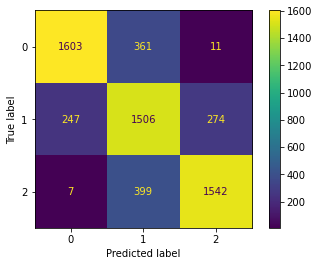

In [66]:
# Matriz de confusion para Random Forest
y_pred = pd.cut(y_pred.flatten(), bins=bins, labels=False)

mc_rf = confusion_matrix(y_test_clas, y_pred)
ConfusionMatrixDisplay(confusion_matrix=mc_rf).plot();

# Almacenamos los datos
mc['RandomForest_Reg'] = mc_rf

**Clasificación**

In [67]:
# Librerias
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

Procedemos, como en el caso anterior, buscando los hiperparámetros óptimos para el modelo.

In [68]:
# Posibles profundidades y estimadores 
ps = np.array(range(50,250))
ns = np.array(range(3,10))

h_parameters = {'n_estimators': ps,
              'max_depth': ns}

# Definimos el modelo
rf = RandomForestClassifier()

# Busqueda aleatorizada de hiperparametros 
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = h_parameters, 
                                 n_iter=5, 
                                 cv=5)
rand_search.fit(X_train, y_train_clas)

# Mejores parametros
best_rf = rand_search.best_estimator_
print('Mejores hiperparámetros:',  rand_search.best_params_)

Mejores hiperparámetros: {'n_estimators': 224, 'max_depth': 7}


Así, ajustamos el modelo con los hiperparámetros encontrados

In [69]:
# Ajustamos el modelo
rf = RandomForestClassifier(n_estimators=197,max_depth=7)
rf.fit(X_train, y_train_clas)

# Hacemos predicciones sobre los datos de train
y_pred_train_rf = rf.predict(X_train)
# Hacemos predicciones sobre los datos de est
y_pred_rf = rf.predict(X_test)

En primer lugar, vemos cómo de bueno ha sido el entrenamiento

In [70]:
# Ajuste datos train
acc_train_rf = accuracy_score(y_pred_train_rf, y_train_clas)
print('Accuracy train Random Forest: ', acc_train_rf)

Accuracy train Random Forest:  0.789871776401095


Evaluamos el ajuste del modelo

In [71]:
# Ajuste del modelo para los datos de test
acc_test_rf = accuracy_score(y_pred_rf, y_test_clas)
print('Accuracy test Random Forest: ', acc_test_rf)

Accuracy test Random Forest:  0.7689075630252101


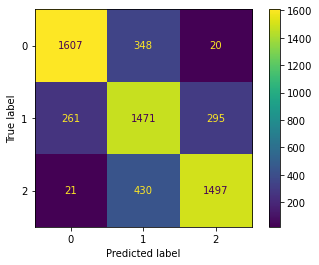

In [72]:
# Grafico de matriz de confusion
mc_rf = confusion_matrix(y_test_clas, y_pred_rf)
ConfusionMatrixDisplay(confusion_matrix=mc_rf).plot();

In [73]:
# Almacenamos los datos
acc_test['RandomForest'] = acc_test_rf
acc_train['RandomForest'] = acc_train_rf
mc['RandomForest'] = mc_rf
precision['RandomForest'] = precision_score(y_test_clas, y_pred_rf, average='weighted')
recall['RandomForest'] = recall_score(y_test_clas, y_pred_rf,average='weighted')

También podemos ver la importancia de las varibles a la hora de predecir el precio de las casas

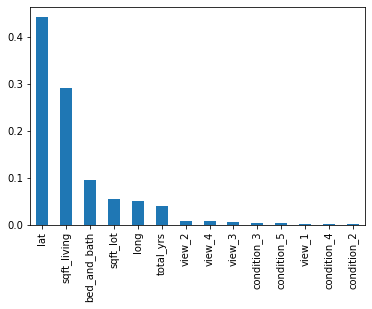

In [74]:
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances.plot.bar();

## 3.6 GradientBoost

**METER TEORIA + TEXTOS**

**Regresión**

In [75]:
# Librerias
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Hiperparametros

In [76]:
# Ajustamos el modelo
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

# Hacemos predicciones en test
y_pred = gb.predict(X_test)

In [77]:
# Medidas de error
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred))
r2_gb  = r2_score(y_test, y_pred)
# Error Cuadrado Medio
print("Root Mean squared error: %.2f" % rmse_gb)
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_gb)

# Almacenamos los datos
rmse['GradientBoost'] = rmse_gb
r2['GradientBoost'] = r2_gb

Root Mean squared error: 0.20
Variance score: 0.82


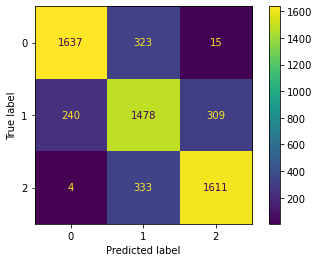

In [78]:
# Matriz de confusion para Random Forest
y_pred = pd.cut(y_pred.flatten(), bins=bins, labels=False)

mc_gb_reg = confusion_matrix(y_test_clas, y_pred)
ConfusionMatrixDisplay(confusion_matrix=mc_gb_reg).plot();

# Almacenamos los datos
mc['GB_Regg'] = mc_gb_reg

**Clasificación**

In [79]:
# Librerias
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
# Ajustamos el modelo
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train_clas)

# Hacemos predicciones sobre los datos de train
y_pred_train_gb = gb.predict(X_train)
# Hacemos predicciones sobre los datos de est
y_pred_gb = gb.predict(X_test)

In [81]:
# Ajuste datos train
acc_train_gb = accuracy_score(y_pred_train_gb, y_train_clas)
print('Accuracy train Gradient Boost: ', acc_train_gb)

Accuracy train Gradient Boost:  0.8253133554242904


In [82]:
# Ajuste del modelo para los datos de test
acc_test_gb = accuracy_score(y_pred_gb, y_test_clas)
print('Accuracy test Gradient Boost: ', acc_test_gb)

Accuracy test Gradient Boost:  0.7976470588235294


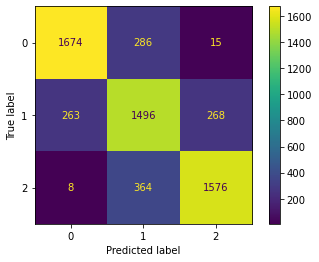

In [83]:
# Grafico de matriz de confusion
mc_gb = confusion_matrix(y_test_clas, y_pred_gb)
ConfusionMatrixDisplay(confusion_matrix=mc_gb).plot();

In [84]:
# Almacenamos los datos
acc_test['GradientBoost'] = acc_test_gb
acc_train['GradientBoost'] = acc_train_gb
mc['GradientBoost'] = mc_gb
precision['GradientBoost'] = precision_score(y_test_clas, y_pred_gb, average='weighted')
recall['GradientBoost'] = recall_score(y_test_clas, y_pred_gb,average='weighted')

## 3.7 XGBoost

**METER TEORIA + TEXTOS**

**Regresión**

In [ ]:
#!pip install xgboost

In [85]:
# Librerias
from xgboost import XGBRegressor

In [86]:
# Ajustamos el modelo
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

# Hacemos predicciones en test
y_pred = xgb_reg.predict(X_test)

In [87]:
# Medidas de error
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
r2_xgb  = r2_score(y_test, y_pred)
# Error Cuadrado Medio
print("Root Mean squared error: %.2f" % rmse_gb)
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_gb)

# Almacenamos los datos
rmse['GradientBoost'] = rmse_gb
r2['GradientBoost'] = r2_gb

Root Mean squared error: 0.20
Variance score: 0.82


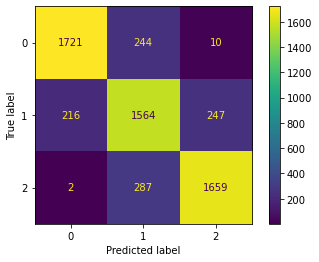

In [88]:
# Matriz de confusion para Random Forest
y_pred = pd.cut(y_pred.flatten(), bins=bins, labels=False)

mc_xgb_reg = confusion_matrix(y_test_clas, y_pred)
ConfusionMatrixDisplay(confusion_matrix=mc_xgb_reg).plot();

# Almacenamos los datos
mc['XGBoost_Regg'] = mc_xgb_reg

**Clasificación**

In [89]:
# Librerias
from xgboost import XGBClassifier

In [90]:
# Ajustamos el modelo
xgb = XGBClassifier()
xgb.fit(X_train, y_train_clas)

# Hacemos predicciones sobre los datos de train
y_pred_train_xgb = xgb.predict(X_train)
# Hacemos predicciones sobre los datos de est
y_pred_xgb = xgb.predict(X_test)

In [91]:
# Ajuste datos train
acc_train_xgb = accuracy_score(y_pred_train_xgb, y_train_clas)
print('Accuracy train XGBoost: ', acc_train_xgb)

Accuracy train XGBoost:  0.9460452384382654


In [92]:
# Ajuste datos test
acc_test_xgb = accuracy_score(y_pred_xgb, y_test_clas)
print('Accuracy test XGBoost: ', acc_test_xgb)

Accuracy test XGBoost:  0.8273949579831933


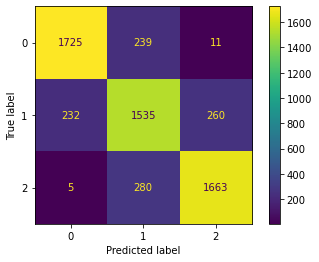

In [93]:
# Grafico de matriz de confusion
mc_xgb = confusion_matrix(y_test_clas, y_pred_xgb)
ConfusionMatrixDisplay(confusion_matrix=mc_xgb).plot();

In [94]:
# Almacenamos los datos
acc_test['XGBoost'] = acc_test_xgb
acc_train['XGBoost'] = acc_train_xgb
mc['XGBoost'] = mc_gb
precision['XGBoost'] = precision_score(y_test_clas, y_pred_xgb, average='weighted')
recall['XGBoost'] = recall_score(y_test_clas, y_pred_xgb,average='weighted')

# 4. Comparación de modelos

Por lo general, la métrica más conveniente dependerá de para qué se quiera utilizar las predicciones del modelo.

Supongamos que el modelo es para un banco que va a tasar casas para, posteriormente, conceder un préstamo. Así, es importante que cuando una casa sea tasada como *CARA* ($2$) esta sea realemente así, pues si el cliente no es capaz de devolver el préstamo el banco tendrá más pérdidas.

Teniendo en cuenta esto, las métricas más relevantes en este caso serían, fijándonose en la matriz de confusión:
1. Que los valores que realmente pertenecen a la clase 2 y se han predicho en clases inferiores (principalmente en la clase 0) sean bajos. Esto también podemos verlo como que el recall de la clase 2 sea lo más alto posible.
2. Que los valores que realmente pertenecen a la clase 1 y se han predicho en clases inferiores (la 0 únicamente en este caso) sean bajos. Equivale a que el recall de la clase 1 sea lo más alto posible.

Así, podemos ver los modelos ordenados según los siguientes criterios:

**Orden por Accuracy en Test**

In [95]:
acc_ordenados = dict(sorted(acc_test.items(), key=lambda item: item[1], reverse=True))
acc_ordenados

{'XGBoost': 0.8273949579831933,
 'Bagging': 0.8063865546218487,
 'GradientBoost': 0.7976470588235294,
 'Arbol': 0.7821848739495798,
 'knn': 0.7768067226890756,
 'RandomForest': 0.7689075630252101}

**Orden por R2**

In [96]:
r2_ordenados = dict(sorted(r2.items(), key=lambda item: item[1], reverse=True))
r2_ordenados

{'Bagg_Reg': 0.8396723287438999,
 'GradientBoost': 0.8243573324084132,
 'RandomForest': 0.8106010432226203,
 'KNN': 0.7939790211542018,
 'Arbol': 0.7256433182030639,
 'LR': 0.6318841748614481}

**Orden según métrica definida al comienzo del apartado**

In [97]:
modelos_ordenados = dict(sorted(mc.items(), key=lambda item: item[1][2][0]))
modelos_ordenados

{'XGBoost_Regg': array([[1721,  244,   10],
        [ 216, 1564,  247],
        [   2,  287, 1659]], dtype=int64),
 'GB_Regg': array([[1637,  323,   15],
        [ 240, 1478,  309],
        [   4,  333, 1611]], dtype=int64),
 'Bagg_Reg': array([[1696,  267,   12],
        [ 242, 1513,  272],
        [   5,  320, 1623]], dtype=int64),
 'RandomForest_Reg': array([[1603,  361,   11],
        [ 247, 1506,  274],
        [   7,  399, 1542]], dtype=int64),
 'Bagging': array([[1720,  244,   11],
        [ 288, 1458,  281],
        [   8,  320, 1620]], dtype=int64),
 'GradientBoost': array([[1674,  286,   15],
        [ 263, 1496,  268],
        [   8,  364, 1576]], dtype=int64),
 'XGBoost': array([[1674,  286,   15],
        [ 263, 1496,  268],
        [   8,  364, 1576]], dtype=int64),
 'knn_reg': array([[1655,  306,   14],
        [ 277, 1429,  321],
        [  14,  359, 1575]], dtype=int64),
 'RandomForest': array([[1607,  348,   20],
        [ 261, 1471,  295],
        [  21,  430, 1497]]

Obtenemos la siguiente clasificación de los modelos:
1. XGBoost Regressor
2. GradientBoost Regressor
3. Bagging Regressor
4. Random Forest Regressor
5. Gradient Boost
6. XGBoost
7. KNN Regressor
8. Random Forest
9. Bagging
10. KNN
11. Tree
12. Tree Regressor
13. Linear Regression

## 4.1 Problema de regresión

Por lo general, los algoritmos desde el punto de vista de la regresión obtienen mejores resultados. Esto puede deberse a que la naturaleza del problema es de regresión, ya que tenemos una variable target *y* continua. 

## 4.2 Problema de clasificación

Al convertir el problema a clasificación, hemos obtenido peores resultados. Sin embargo, aumentando el número de clases inicial probablemente podríamos tener mayor precisión.

# 5. Conclusiones

Otra parte importante es saber qué variables son importantes a la hora de predecir el precio de las casas. En los diferentes algoritmos hemos estado viendo gráficos de *feature_importance* donde estudiamos el peso de cada variable en la regresión o clasificación. En todos los casos, obteníamos algo similar a:

In [ ]:
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances.plot.bar();

Así, parece que una de las componentes más importantes es la localización de la casa (en particular, su latitud), seguido de la superficie de la casa y el número (conjunto) de habitaciones y baños.